# Spaceship Titanic Challenge

- Author: Felipe Camargo de Pauli
- Date: 09/23
- Score: 

## 1. Problem Definition and Strategy
- 1.1 Clearly define the problem and objective.
- 1.2 Understand what the data represents and its characteristics.
- 1.3 Propose an initial solution.

Project Summary: Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

- **Goal** - Predict who was teleported.
- **Proposition** - Simple Data Science and Machine Learning Workflow

## 2. Gather the Data

- 2.1 Seek out the data (datasets)
- 2.2 Define the data type
- 2.3 Prepare them for import into notebooks

The data was provided by the Kaggle. The data is structured and there is no need to prepare it, because it is already ready to import.

## 3. Data Loading, Initial Visualization, and Transformation
- 3.1 Load the data and visualize the first few rows.
- 3.2 Perform individual transformations.
- 3.3 Identify and handle null values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [3]:
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [4]:
train_data = pd.read_csv('./train.csv')
test_data  = pd.read_csv('./test.csv')

In [ ]:
df = train_data.copy(deep = True)
df = pd.concat([df, test_data], axis=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


| Column          | Description   |
|-----------------|---------------|
| **PassengerId** | Every passenger has a unique ID. However, it has a specificity: the ID syntax is GGGG-PP, where G is the group ID (every passenger is part of a group, usually a family, but not necessarily) and PP is the passenger ID. Normally the ID is not relevant, but due to the GGGG, it may be. |
| **HomePlanet**  | The planet from which the passenger departed. It is not necessarily the origin planet, but generally is. |
| **CryoSleep**   | Some passengers were traveling frozen, others normally. Those frozen were confined to their cabin. |
| **Cabin**       | Passenger's cabin. It should be split into Deck/Num/Side, where Side can be P (port) and S (Starboard). Deck can be several letters. We can change the letters and numbers by dummy. |
| **Destination** | The planet to which the passenger is going. There are only three destinations. |
| **Age**         | Age. |
| **VIP**         | Whether the passenger paid for a privileged place. |
| **RoomService** | How much was spent on Room Service. |
| **FoodCourt**   | How much was spent on Food. |
| **ShoppingMall**| How much was spent on shopping. |
| **Spa**         | How much was spent at the spa. |
| **VRDeck**      | How much was spent on entertainment. |
| **Name**        | First and last name of the passenger. It would be nice to get the first and second name and see if there is a correlation. |


In [6]:
# Helpers
def analyse_frequencies(df, columns):
    for column in columns:
        print(f'>> COLUMN: {column}')
        print(df[column].value_counts())
        isColumnNumeric = np.issubdtype(df[column].dtype, np.number)
        if isColumnNumeric:
            print(f'\nMin: {min(df[column])} -- Max: {max(df[column])}\n')
        print('--------------------------------\n')

In [7]:
analyse_frequencies(df, df.columns)

>> COLUMN: PassengerId
0001_01    1
9227_03    1
9220_01    1
9220_02    1
9220_03    1
          ..
4610_01    1
4611_01    1
4612_01    1
4613_01    1
9277_01    1
Name: PassengerId, Length: 12970, dtype: int64
--------------------------------

>> COLUMN: HomePlanet
Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64
--------------------------------

>> COLUMN: CryoSleep
False    8079
True     4581
Name: CryoSleep, dtype: int64
--------------------------------

>> COLUMN: Cabin
G/734/S     8
G/160/P     8
D/176/S     7
G/1476/S    7
B/201/P     7
           ..
E/317/P     1
F/1039/P    1
F/1038/P    1
C/158/P     1
G/1498/S    1
Name: Cabin, Length: 9825, dtype: int64
--------------------------------

>> COLUMN: Destination
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64
--------------------------------

>> COLUMN: Age
18.0    496
24.0    482
21.0    468
19.0    455
22.0    454
       ... 
75.0      6
79.0     

**Identifier**
- [OK] PassengerId        | Split     = Group and Person ID; keep Passenger

**Features**
- [OK] HomePlanet         | Dummy     = Earth, Europa and Mars
- [OK] CryoSleep          | Binary    = 0 False - not in cryosleep, 1 True - in cryosleep
- [OK] Cabin              | Split     = Deck, Num and Side
- [OK] Destination        | Dummy     = TRAPPIST-1e, 55 Cancri e, PSO J318.5-22
- [OK] Age                | (nothing) = Min: 0.0 -- Max: 79.0
- [OK] VIP                | Binary    = 0 False - not VIP, 1 True - VIP
- [OK] RoomService        | (nothing) = Min: 0.0 -- Max: 14327.0
- [OK] FoodCourt          | (nothing) = Min: 0.0 -- Max: 29813.0
- [OK] ShoppingMall       | (nothing) = Min: 0.0 -- Max: 23492.0
- [OK] Spa                | (nothing) = Min: 0.0 -- Max: 22408.0
- [OK] VRDeck             | (nothing) = Min: 0.0 -- Max: 24133.0
- [OK] Name               | Split     = Name and Surname

**New**
- [OK] GroupSize          | The number of people from the same group
- [OK] Group              |(drop)
- [OK] Person ID (drop)   | Verify Uniquity before
- [OK] Name and Surname   | Verify, then drop if it's not necessary
- [OK] LuxaryCost         | Sum of all luxary costs. Keep them = Min: 0 -- Max: 35987.0

**Special NaN**
- None

## Transformation

### Previous analysis

In [8]:
df['PassengerId'].duplicated().sum()

0

In [9]:
df.replace({'nan': np.nan, None: np.nan}, inplace=True)
df.replace(r'^(nan|NA|none|null)$', np.nan, regex=True, inplace=True)
df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

### Splitting

In [10]:
# Identifier - PassengerId
df['Group']     = df['PassengerId'].apply(lambda x: x.split("_")[0])
df['GroupSize'] = df['Group'].map(df['Group'].value_counts())
df.drop("Group", axis=1, inplace=True)

In [11]:
# Cabin
df[['Cabin_Deck', 'Cabin_Num', 'Cabin_Size']] = df['Cabin'].str.split('/', expand=True)
df.drop("Cabin", axis=1, inplace=True)

In [12]:
analyse_frequencies(df, ['Cabin_Deck', 'Cabin_Num', 'Cabin_Size'])

>> COLUMN: Cabin_Deck
F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Cabin_Deck, dtype: int64
--------------------------------

>> COLUMN: Cabin_Num
82      34
4       28
56      28
95      27
31      27
        ..
1848     1
1847     1
1846     1
1844     1
1890     1
Name: Cabin_Num, Length: 1894, dtype: int64
--------------------------------

>> COLUMN: Cabin_Size
S    6381
P    6290
Name: Cabin_Size, dtype: int64
--------------------------------



In [13]:
df['Cabin_Num'].fillna(method='ffill', inplace=True)
df["Cabin_Num"].isna().sum()
df["Cabin_Num"] = df["Cabin_Num"].astype(np.uint8)

In [14]:
# Name
df[["Name", "Surname"]] = df["Name"].str.split(expand=True)

In [15]:
analyse_frequencies(df, ["Name", "Surname"])

>> COLUMN: Name
Luise     16
Idace     16
Ale       15
Thel      14
Kaye      14
          ..
Smark      1
Mureah     1
Grey       1
Pix        1
Perit      1
Name: Name, Length: 2883, dtype: int64
--------------------------------

>> COLUMN: Surname
Buckentry      19
Belley         19
Hinglendez     18
Fowlesterez    18
Casonston      18
               ..
Cabraseed       1
Miste           1
Imotive         1
Gepie           1
Replic          1
Name: Surname, Length: 2406, dtype: int64
--------------------------------



In [16]:
df.drop(["Name", "Surname"], axis=1, inplace=True)

### Dummies

In [17]:
# Dummies
df = pd.get_dummies(df, "HP", "_",      columns=["HomePlanet"],  dummy_na=True)
df = pd.get_dummies(df, "Dest", "_",    columns=["Destination"], dummy_na=True)
df = pd.get_dummies(df, "C_Deck", "_",  columns=["Cabin_Deck"],  dummy_na=True)
df = pd.get_dummies(df, "C_Size", "_",  columns=["Cabin_Size"],  dummy_na=True)


In [18]:
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,C_Deck_C,C_Deck_D,C_Deck_E,C_Deck_F,C_Deck_G,C_Deck_T,C_Deck_nan,C_Size_P,C_Size_S,C_Size_nan
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,0,0,0,0,0,0,0,1,0,0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,0,0,0,1,0,0,0,0,1,0
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,0,0,0,0,0,0,0,0,1,0
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,0,0,0,0,0,0,0,0,1,0
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,0,0,0,1,0,0,0,0,1,0


### Binaries

In [19]:
# Binaries
df["CryoSleep"] = df["CryoSleep"].apply(lambda x: 1 if "True" else 0).astype(np.int8)   # Can be better
df["VIP"]       = df["VIP"].apply(lambda x: 1 if "True" else 0)         # Can be better


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         12970 non-null  object 
 1   CryoSleep           12970 non-null  int8   
 2   Age                 12700 non-null  float64
 3   VIP                 12970 non-null  int64  
 4   RoomService         12707 non-null  float64
 5   FoodCourt           12681 non-null  float64
 6   ShoppingMall        12664 non-null  float64
 7   Spa                 12686 non-null  float64
 8   VRDeck              12702 non-null  float64
 9   Transported         8693 non-null   object 
 10  GroupSize           12970 non-null  int64  
 11  Cabin_Num           12970 non-null  uint8  
 12  HP_Earth            12970 non-null  uint8  
 13  HP_Europa           12970 non-null  uint8  
 14  HP_Mars             12970 non-null  uint8  
 15  HP_nan              12970 non-null  uint8  
 16  Dest_

In [21]:
# Target
df["Transported"] = df["Transported"].apply(lambda x: 1 if x else 0)

### New

In [22]:
# LuxaryCost
df["LuxaryCost"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]

In [23]:
analyse_frequencies(df, ["LuxaryCost"])

>> COLUMN: LuxaryCost
0.0        4858
809.0        71
788.0        54
803.0        49
908.0        47
           ... 
1472.0        1
11737.0       1
1333.0        1
3370.0        1
5478.0        1
Name: LuxaryCost, Length: 2680, dtype: int64

Min: 0.0 -- Max: 35987.0

--------------------------------



In [24]:
df.isna().sum()

PassengerId              0
CryoSleep                0
Age                    270
VIP                      0
RoomService            263
FoodCourt              289
ShoppingMall           306
Spa                    284
VRDeck                 268
Transported              0
GroupSize                0
Cabin_Num                0
HP_Earth                 0
HP_Europa                0
HP_Mars                  0
HP_nan                   0
Dest_55 Cancri e         0
Dest_PSO J318.5-22       0
Dest_TRAPPIST-1e         0
Dest_nan                 0
C_Deck_A                 0
C_Deck_B                 0
C_Deck_C                 0
C_Deck_D                 0
C_Deck_E                 0
C_Deck_F                 0
C_Deck_G                 0
C_Deck_T                 0
C_Deck_nan               0
C_Size_P                 0
C_Size_S                 0
C_Size_nan               0
LuxaryCost            1363
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         12970 non-null  object 
 1   CryoSleep           12970 non-null  int8   
 2   Age                 12700 non-null  float64
 3   VIP                 12970 non-null  int64  
 4   RoomService         12707 non-null  float64
 5   FoodCourt           12681 non-null  float64
 6   ShoppingMall        12664 non-null  float64
 7   Spa                 12686 non-null  float64
 8   VRDeck              12702 non-null  float64
 9   Transported         12970 non-null  int64  
 10  GroupSize           12970 non-null  int64  
 11  Cabin_Num           12970 non-null  uint8  
 12  HP_Earth            12970 non-null  uint8  
 13  HP_Europa           12970 non-null  uint8  
 14  HP_Mars             12970 non-null  uint8  
 15  HP_nan              12970 non-null  uint8  
 16  Dest_

## 4. Exploratory Data Analysis (EDA)


- 4.1 Visualize direct correlation between each Feature and Target.
- 4.2 Analyze descriptive statistics and distributions.
- 4.3 Identify and handle inconsistencies and outliers.
- 4.4 Visualize relationships and correlations between variables.

In [26]:
df_test = df.copy()[len(train_data):]
df = df[0:len(train_data)]

/tmp/ipykernel_217516/1168209765.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


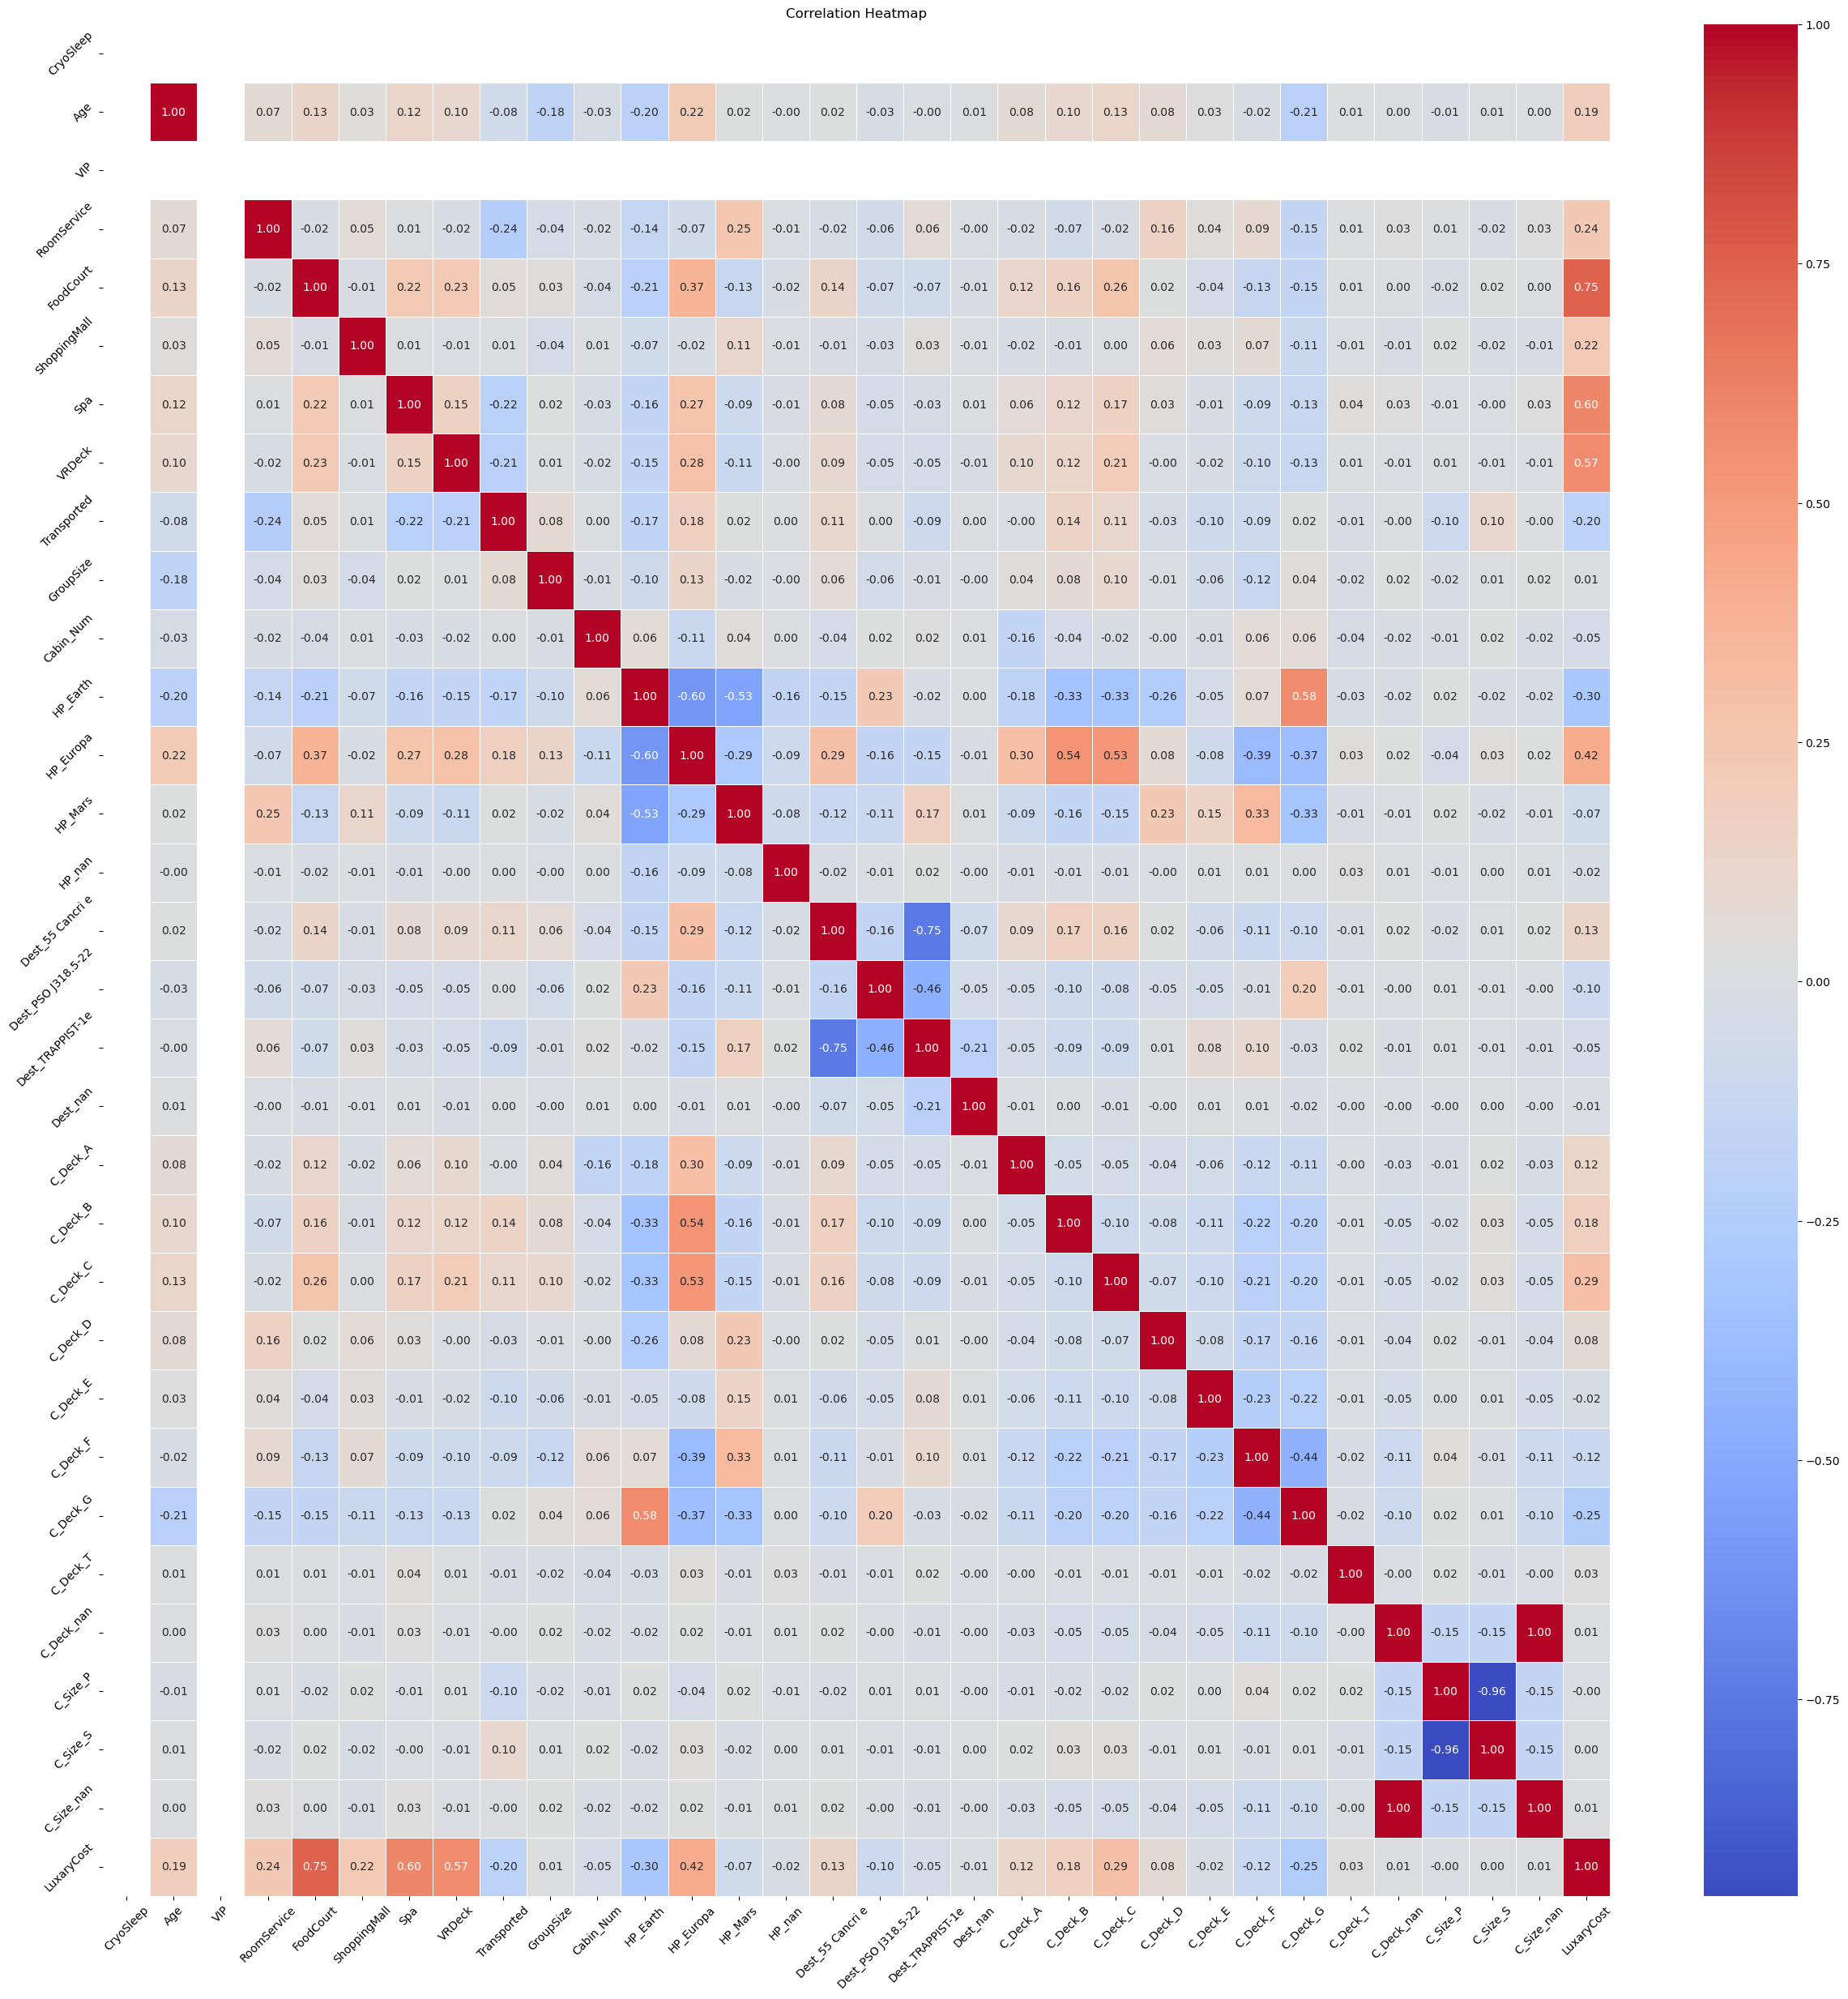

In [27]:
plt.figure(figsize=(30,30))

correlations = df.corr()
# Cria um heatmap
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)


# Título
plt.title('Correlation Heatmap')

# Ajusta os rótulos para melhor visualização
plt.xticks(rotation=45) 
plt.yticks(rotation=45) 

# Exibe o gráfico
plt.show()

## Hipotheses
#### Age
**Facts**
- Greater corr = HP.Europe
- Less people were teletransported than not;
- Crianças entre 0 e 12 anos são mais suscetíveis ao teletransporte;
- mean       28.827930
- std        14.489021
- min         0.000000
- 25%        19.000000
- 50%        27.000000
- 75%        38.000000
- max        79.000000
- **Fill null value with std**

**Hypothesis**
- One mean for teletransported and other for not

#### Cabin_Num
**Facts**


**Hypothesis**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         8693 non-null   object 
 1   CryoSleep           8693 non-null   int8   
 2   Age                 8514 non-null   float64
 3   VIP                 8693 non-null   int64  
 4   RoomService         8512 non-null   float64
 5   FoodCourt           8510 non-null   float64
 6   ShoppingMall        8485 non-null   float64
 7   Spa                 8510 non-null   float64
 8   VRDeck              8505 non-null   float64
 9   Transported         8693 non-null   int64  
 10  GroupSize           8693 non-null   int64  
 11  Cabin_Num           8693 non-null   uint8  
 12  HP_Earth            8693 non-null   uint8  
 13  HP_Europa           8693 non-null   uint8  
 14  HP_Mars             8693 non-null   uint8  
 15  HP_nan              8693 non-null   uint8  
 16  Dest_5

### Age

/tmp/ipykernel_217516/3867841062.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Transported', y='Cabin_Num', data=df, ci=None, ax=axs[0, 0])


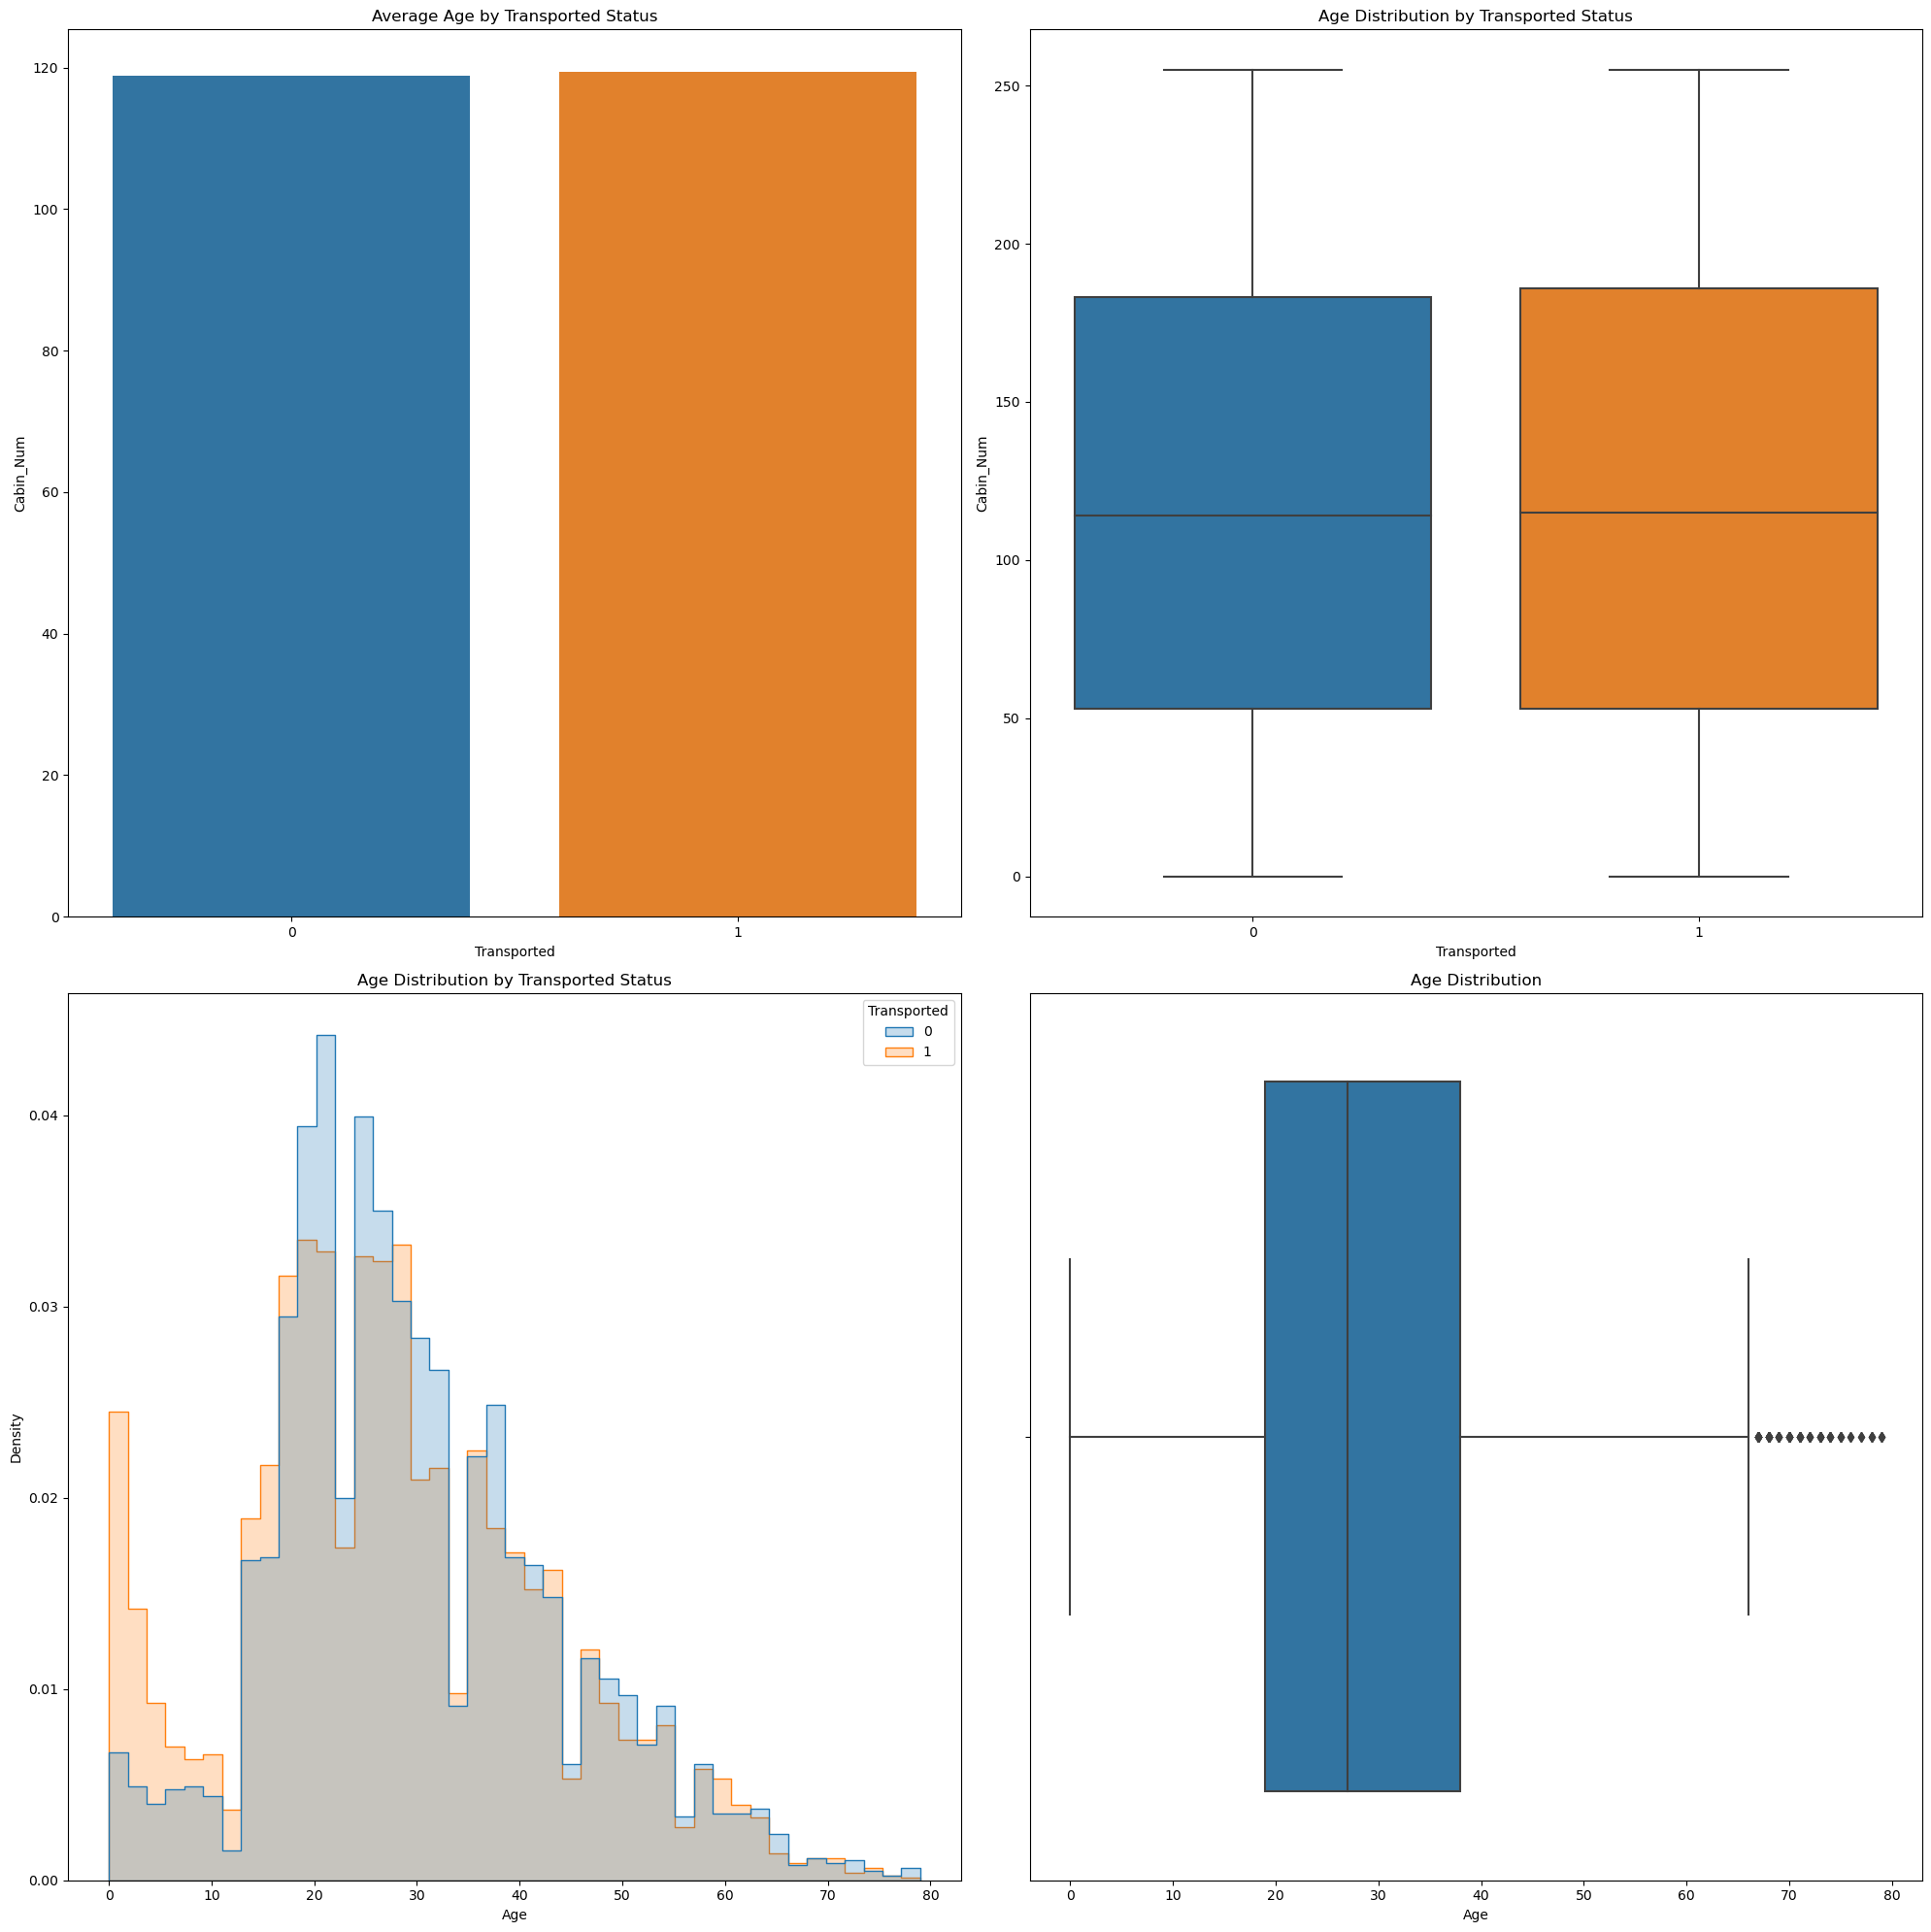

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma figura e uma grade de subplots com 2 linhas e 4 colunas
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot 1: Barplot
sns.barplot(x='Transported', y='Cabin_Num', data=df, ci=None, ax=axs[0, 0])
axs[0, 0].set_title('Average Age by Transported Status')

# Plot 2: Boxplot
sns.boxplot(x='Transported', y='Cabin_Num', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Age Distribution by Transported Status')

# Plot 3: Histograma
sns.histplot(df, x='Age', hue='Transported', element='step', stat='density', common_norm=False, ax=axs[1, 0])
axs[1, 0].set_title('Age Distribution by Transported Status')

# Plot 4: Boxplot
sns.boxplot(x='Age', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Age Distribution')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()


In [30]:
df["Age"].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [31]:
from scipy.stats import ttest_ind

# Divide o dataset
transported = df[df['Transported'] == True]['Age'].dropna()
not_transported = df[df['Transported'] == False]['Age'].dropna()

# Teste t
t_stat, p_value = ttest_ind(transported, not_transported)

# Mostra os resultados
print(f't-statistic: {t_stat}\np-value: {p_value}')

t-statistic: -6.941461666045089
p-value: 4.165050977554494e-12


In [32]:
tfalse_mean, ttrue_mean = df.groupby("Transported").mean()["Age"]
tfalse_mean = round(tfalse_mean, 2)
ttrue_mean = round(ttrue_mean, 2)
print(f'Transported    : {tfalse_mean}\nNot Transported: {ttrue_mean}')

Transported    : 29.92
Not Transported: 27.75


/tmp/ipykernel_217516/4063168781.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tfalse_mean, ttrue_mean = df.groupby("Transported").mean()["Age"]


In [33]:
df.loc[(df['Age'].isna()) & (df['Transported']), 'Age']  = ttrue_mean
df.loc[(df['Age'].isna()) & (~df['Transported']), 'Age'] = tfalse_mean

In [34]:
df["Transported"].info()

<class 'pandas.core.series.Series'>
Int64Index: 8693 entries, 0 to 8692
Series name: Transported
Non-Null Count  Dtype
--------------  -----
8693 non-null   int64
dtypes: int64(1)
memory usage: 135.8 KB


In [35]:
df.isna().sum()

PassengerId             0
CryoSleep               0
Age                     0
VIP                     0
RoomService           181
FoodCourt             183
ShoppingMall          208
Spa                   183
VRDeck                188
Transported             0
GroupSize               0
Cabin_Num               0
HP_Earth                0
HP_Europa               0
HP_Mars                 0
HP_nan                  0
Dest_55 Cancri e        0
Dest_PSO J318.5-22      0
Dest_TRAPPIST-1e        0
Dest_nan                0
C_Deck_A                0
C_Deck_B                0
C_Deck_C                0
C_Deck_D                0
C_Deck_E                0
C_Deck_F                0
C_Deck_G                0
C_Deck_T                0
C_Deck_nan              0
C_Size_P                0
C_Size_S                0
C_Size_nan              0
LuxaryCost            908
dtype: int64

### Room Service, FoodCourt, ShoppingMall, Spa and VRDeck

In [36]:
# It could be better
simple_mean_colums = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for column in simple_mean_colums:
    df[column] = df[column].fillna(df[column].mean())
    
df["LuxaryCost"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]

In [37]:
df.isna().sum()

PassengerId           0
CryoSleep             0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Transported           0
GroupSize             0
Cabin_Num             0
HP_Earth              0
HP_Europa             0
HP_Mars               0
HP_nan                0
Dest_55 Cancri e      0
Dest_PSO J318.5-22    0
Dest_TRAPPIST-1e      0
Dest_nan              0
C_Deck_A              0
C_Deck_B              0
C_Deck_C              0
C_Deck_D              0
C_Deck_E              0
C_Deck_F              0
C_Deck_G              0
C_Deck_T              0
C_Deck_nan            0
C_Size_P              0
C_Size_S              0
C_Size_nan            0
LuxaryCost            0
dtype: int64

### Cabin_Num

/tmp/ipykernel_217516/2479184656.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Transported', y='Cabin_Num', data=df, ci=None, ax=axs[0, 0])


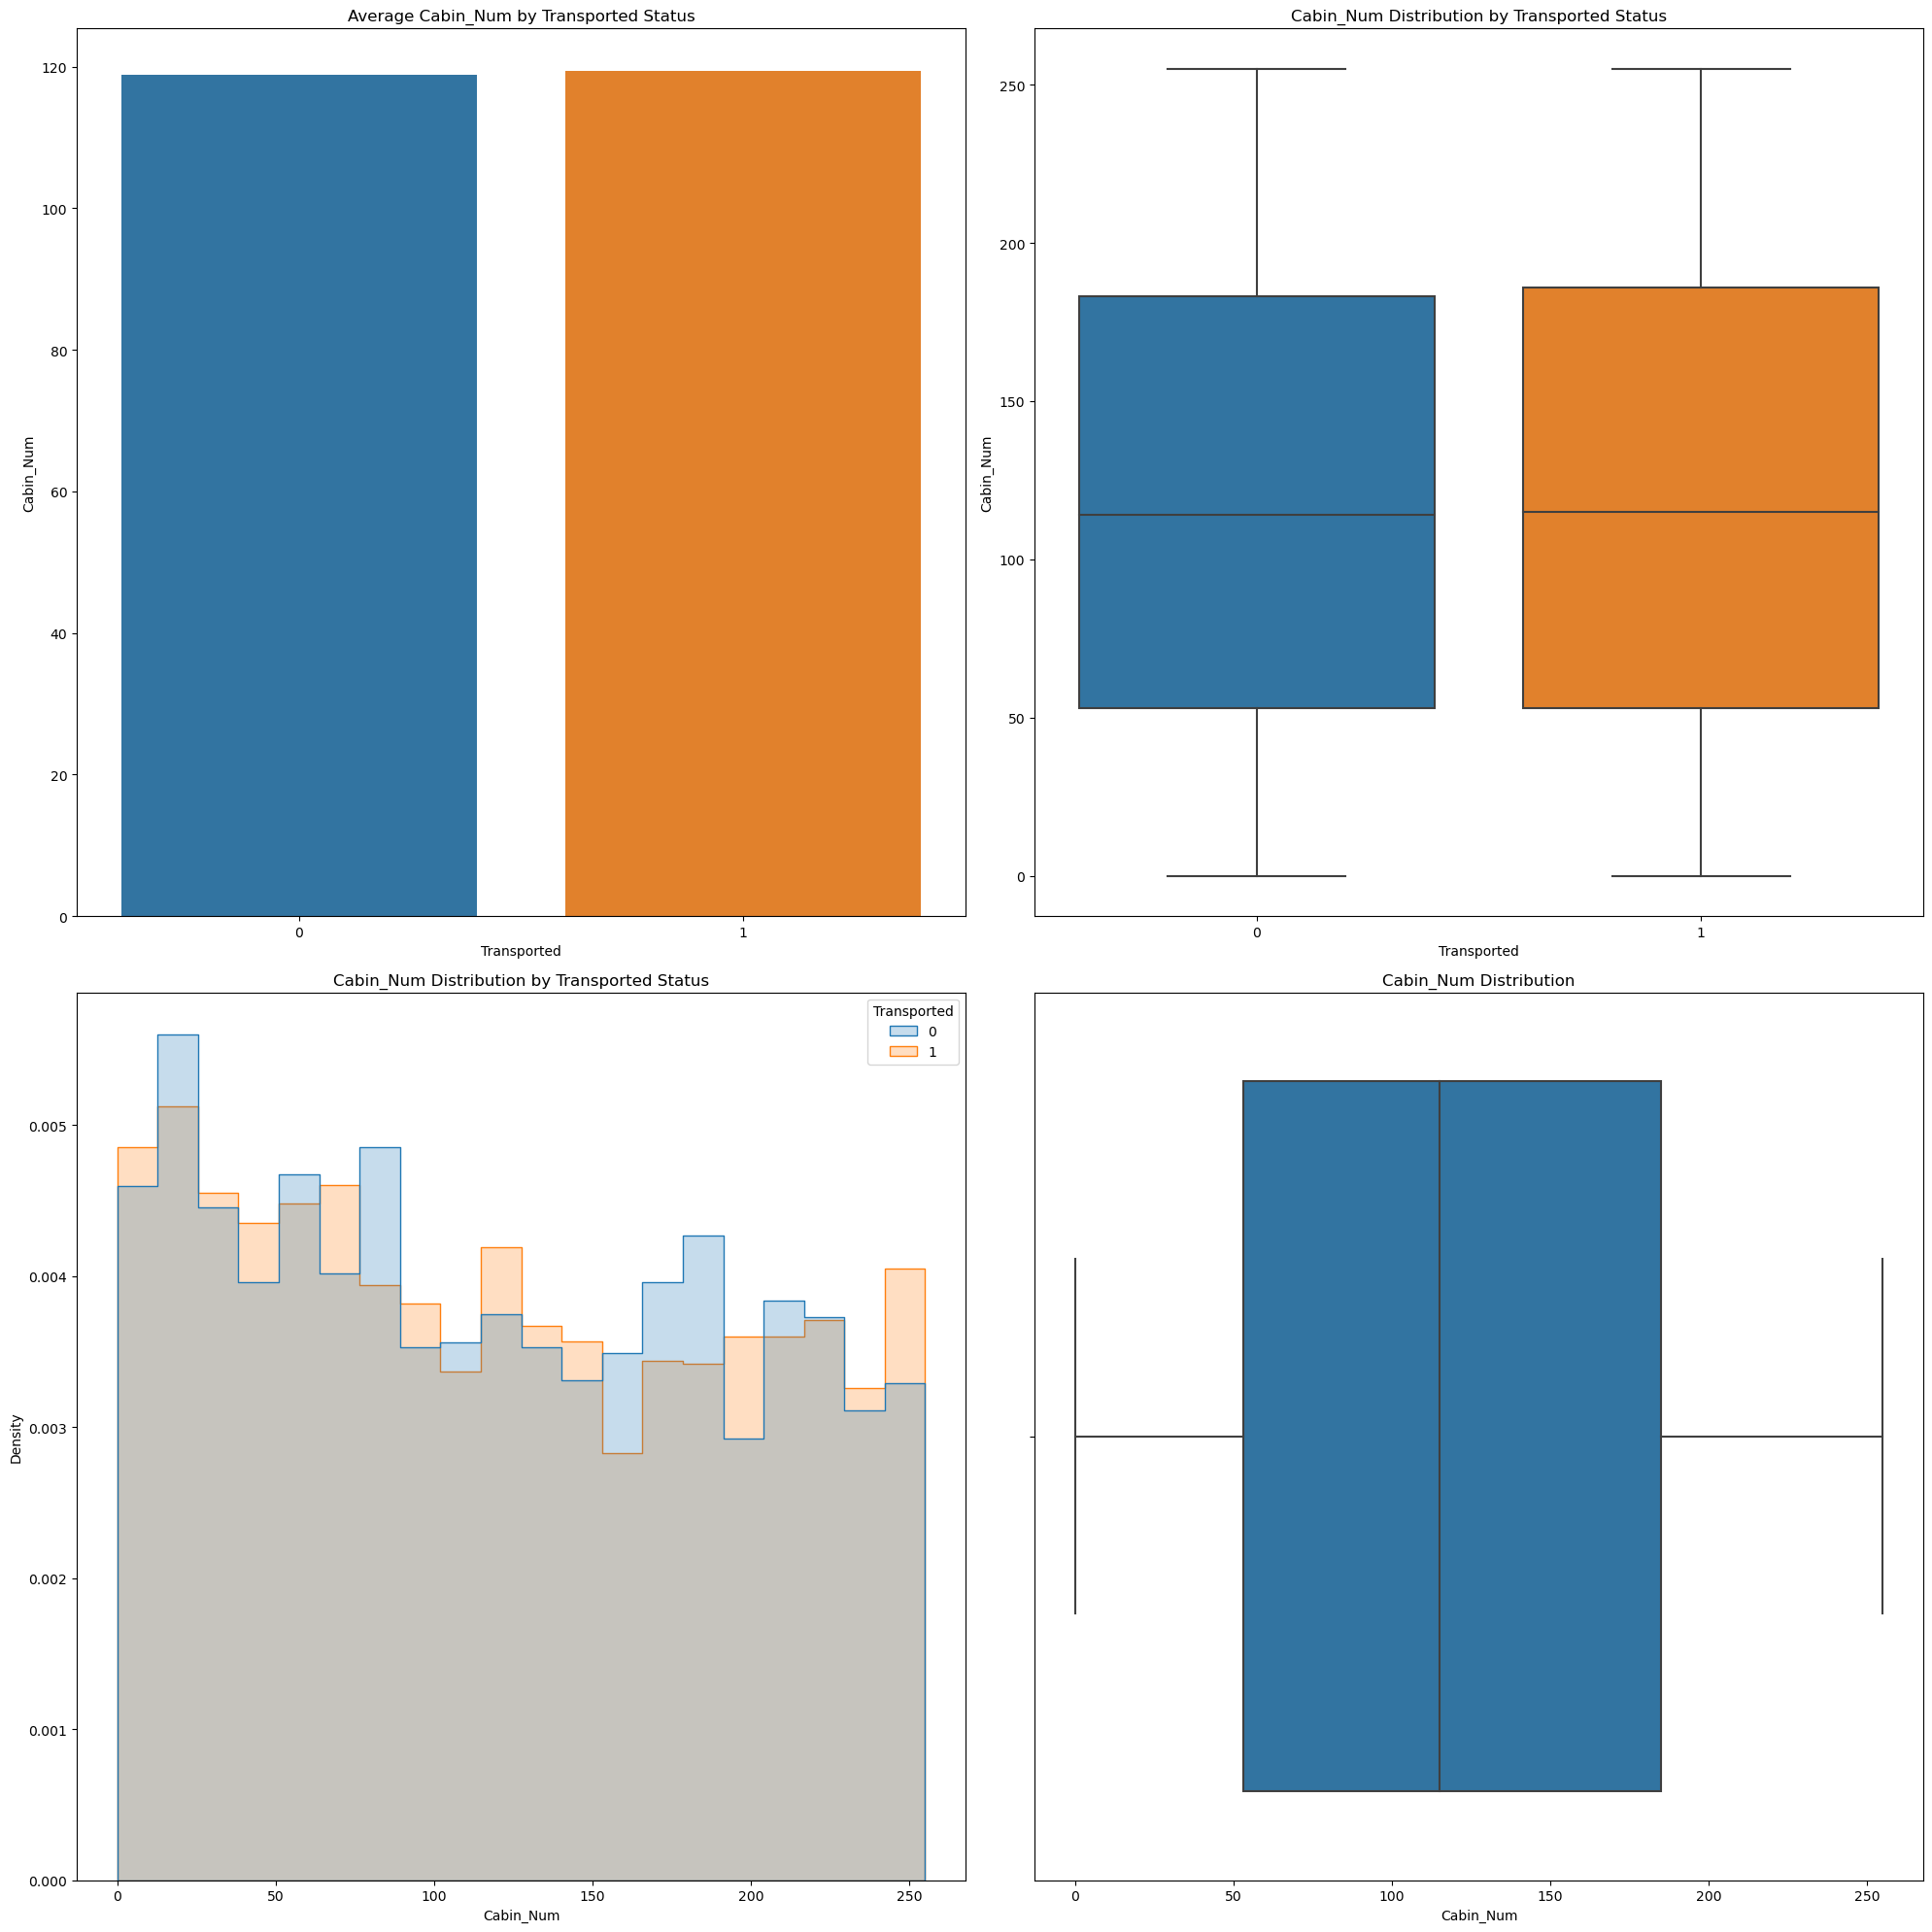

In [38]:
# Criar uma figura e uma grade de subplots com 2 linhas e 4 colunas
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot 1: Barplot
sns.barplot(x='Transported', y='Cabin_Num', data=df, ci=None, ax=axs[0, 0])
axs[0, 0].set_title('Average Cabin_Num by Transported Status')

# Plot 2: Boxplot
sns.boxplot(x='Transported', y='Cabin_Num', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Cabin_Num Distribution by Transported Status')

# Plot 3: Histograma
sns.histplot(df, x='Cabin_Num', hue='Transported', element='step', stat='density', common_norm=False, ax=axs[1, 0])
axs[1, 0].set_title('Cabin_Num Distribution by Transported Status')

# Plot 4: Boxplot
sns.boxplot(x='Cabin_Num', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Cabin_Num Distribution')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()

In [39]:
df["Cabin_Num"].describe()

count    8693.000000
mean      119.144139
std        74.927064
min         0.000000
25%        53.000000
50%       115.000000
75%       185.000000
max       255.000000
Name: Cabin_Num, dtype: float64

In [40]:
df["Cabin_Num"] = df["Cabin_Num"].fillna(df["Cabin_Num"].mean())


In [41]:
df.isna().sum()

PassengerId           0
CryoSleep             0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Transported           0
GroupSize             0
Cabin_Num             0
HP_Earth              0
HP_Europa             0
HP_Mars               0
HP_nan                0
Dest_55 Cancri e      0
Dest_PSO J318.5-22    0
Dest_TRAPPIST-1e      0
Dest_nan              0
C_Deck_A              0
C_Deck_B              0
C_Deck_C              0
C_Deck_D              0
C_Deck_E              0
C_Deck_F              0
C_Deck_G              0
C_Deck_T              0
C_Deck_nan            0
C_Size_P              0
C_Size_S              0
C_Size_nan            0
LuxaryCost            0
dtype: int64

## 7. Modeling
7.1 Split the data into training and testing sets.
7.2 Select and train initial models.
7.3 Evaluate and compare the performance of the models.
7.4 Hyperparameter tuning and optimization.

In [42]:
X = df.drop(['PassengerId', 'Transported'], axis=1)
y = df["PassengerId"]

In [43]:

print(f'{X.shape}')
print(f'{y.shape}')
X.info()

(8693, 31)
(8693,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CryoSleep           8693 non-null   int8   
 1   Age                 8693 non-null   float64
 2   VIP                 8693 non-null   int64  
 3   RoomService         8693 non-null   float64
 4   FoodCourt           8693 non-null   float64
 5   ShoppingMall        8693 non-null   float64
 6   Spa                 8693 non-null   float64
 7   VRDeck              8693 non-null   float64
 8   GroupSize           8693 non-null   int64  
 9   Cabin_Num           8693 non-null   uint8  
 10  HP_Earth            8693 non-null   uint8  
 11  HP_Europa           8693 non-null   uint8  
 12  HP_Mars             8693 non-null   uint8  
 13  HP_nan              8693 non-null   uint8  
 14  Dest_55 Cancri e    8693 non-null   uint8  
 15  Dest_PSO J318.5-22  8693 non-null   

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Modelos
models = {
    # 'Logistic Regression': LogisticRegression(),
    # 'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    # 'Support Vector Classifier': SVC(),
}

# Treinar e avaliar modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)
    print(f'{name}: {accuracy}')
